# Min Cut Lab
**Objectives:**
- Understand the formulation of a min cut instance, in particular
    - using infinite capacity edges
    - finding an s-t cut
    - using it to solve the Densest Subgraph problem

## Part 1: The Densest Subgraph Problem
In the first part of this lab, we will introduce the densest subgraph problem and model it by reducing it to an instance of the Minimum Cut problem. This problem is used frequently in social network analysis as it helps us identify communities within a certain network and helps us separate meaningful data among a large network by decreasing our sample size of significant data points. We will explore some applications of the problem in the latter part of this lab.

Let's first go through some notation: the density of a graph is defined by the number of edges induced in the graph (fully contained inside the graph) divided by the number of nodes in the graph. Let us denote the graph and density with $$G = (V, E), d = \frac{|E|}{|V|}.$$

Suppose we are given the following graph and the subgraph with vertices $S = \{1, 2, 5\}$ shown in red. Then the edges induced by the subgraph are precisely the ones outlined in yellow:

![title](images-lab/density_ex.png)

The density of the subgraph defined by the vertices in $S$ is then $\frac{|E|}{|V|} = \frac{3}{3} = 1$.

Now, answer the following questions about this graph with $S = \{1, 2, 4\}$:

![title](images-lab/density_q.png)

**Q:** Which edges are induced (completely contained) by the subgraph given by the vertices in red? Hint: there should only be one.

**A:** <font color='blue'> the edge (1,2) </font>

**Q:** What is the density of this subgraph?

**A:** <font color='blue'> $\frac{|E|}{|V|} = \frac{1}{3} = .33$ </font>

**Q:** You'll notice that this indeed is not the densest subgraph we could have chosen. What vertices do you think would make up the densest subgraph in this case? Hint: its density should be 1.25

**A:** <font color='blue'> 1, 2, 3, 5 </font>

Now, we will first focus on the non-optimization aspect of the densest subgraph problem. That is, we want to answer the question: does there exist a subset of nodes S such that the density of the subgraph it makes up is at least $\lambda$?

**Q:** Write an equation that if satisfied, proves the existence of such a subset S. Let E(S) be the edge set induced by the nodes in S (edges going from a node in S to another node in S). Write your answer in terms of $\lambda$, $|E(S)|$, and $|S|$. Hint: it should represent an inequality that says "the density of the subgraph is greater than or equal to a certain value"

**A:** <font color='blue'> $\frac{|E(S)|}{|S|} \geq \lambda$ </font>

**Q:** Rewrite the equation such that we have an equation of the form $a - b*c \geq 0$.

**A:** <font color='blue'> $|E(S)| - \lambda |S| \geq 0$ </font>

So, if we want to prove that there exists some subset of nodes S that has density at least $\lambda$, we just need to find one such S that satisfies the equation above. Since the relationship is greater than or equal to, we can try to maximize the LHS such that if our maximum value is $\geq 0$ then we know we have found a set S that satisfies this property. Thus, our goal is $$maximize |E(S)| - \lambda |S|$$ and we want to see if that value is $\geq 0$.

Notice that there are two components to this equation. **The first part can be interpreted as receiving one unit of benefit for each edge induced by the set $S$ we are choosing. The second part can be interpreted as paying $\lambda$ units of cost for every node that we include in our set $S$.** Is this starting to sound familiar?

This is exactly similar to the tool selection problem! In that problem, we wanted to find a subset of tasks to complete given that we gain a certain amount of revenue for each task finished, but have to pay a certain cost to use the tools needed for each task. Luckily enough, that problem also had the optimization of finding such a subset such that our overall profit was positive.

Let's model the densest subgraph instance as a tool selection problem! Since we gain benefit from including edges, let the edge set of the graph, $E$, take the role of the tasks in the model. Similarly, let the vertex set of the graph, $V$, take the role of the tools in the model.

Rather than choosing tools so that certain tasks can be completed, we can think of this as *choosing nodes such that certain edges are induced by our subset $S$.*

Let's say we are given the following graph (same as before), and we want to see if there is a subgraph with density at least 1.2.

![title](images-lab/graph_1.png)


**Q:** Draw the min cut instance for the above graph. Hint: there should be a "layer" for nodes representing edges in the original graph, and another "layer" for vertex nodes.

**A:** ![title](images-key/reduction_graph_1.png)

Given that the objective function of the tool selection problem was really `maximize b - c` where $b$ was the total benefit of all the tasks completed and $c$ was the total cost of all the tools used, the "equivalent" objective function of the minimum cost reduction was to minimize just the total cost, which was measured by the opportunity cost of jobs not taken added with the cost of using tools for the jobs we did take.

**Q:** In plain English, what are the two costs that we want to minimize for the densest subgraph problem?

**A:** <font color='blue'> the opportunity cost of not inducing an edge and the cost of including more vertices in our subgraph </font>

Let the edge set from the original graph be $E = E(S) \cup \overline{E(S)}$, where $E(S)$ is the set of all edges induced by the subgraph and $\overline{E(S)}$ is the set of all edges not induced. Let the vertex set be $V = S \cup T$, where $S$ is the set of all vertices included in our subgraph and $T$ is the set of vertices not included.  

If you answered Q4 correctly, the equivalent objective function for your answer should be $$ minimize |\overline{E(S)}| + \lambda|S|.$$

Let's dissect this objective function to see the parallels:

**Q:** For every edge we do not induce in our subgraph, what is the opportunity cost?

**A:** <font color='blue'> 1 (the coefficient in front of the term $|\overline{E(S)}|$ is 1) </font>

**Q:** For every vertex we add to our subgraph, what is the cost?

**A:** <font color='blue'> $\lambda$ (the coefficient in front of the term $|S|$ is $\lambda$) </font>

Now, it may not be immediately apparent, but this is exactly the objective function we said we wanted to use at the beginning of the lab! Let's see how that is. We first need to change it into a maximization function.

**Q:** What is the maximization equivalent of the minimization objective function we were looking at above?

**A:** <font color='blue'> *maximize* $-|\overline{E(S)}| - \lambda|S|$  </font>

**Q:** You should have ended up with an equation in terms of only $|\overline{E(S)}|$, $|S|$, and $\lambda$. We can rewrite $|\overline{E(S)}|$ in terms of $|E|$ and $|E(S)|$. Substitute $|\overline{E(S)}|$ from Q6 and write the new maximization equation below.

**A:** <font color='blue'> *maximize* $-(|E| - |E(S)|) - \lambda|S|$ or *maximize* $-|E| + |E(S)| - \lambda|S|$ </font>

Notice that $|E|$ is a property of the original graph and is independent of any subgraph we may choose, thus it is a constant that we can remove it from the objective function since constants contribute the same value to any solution. Finally, we end up with the function: *maximize* $|E(S)| - \lambda|S|$ which is exactly what we wanted!

Essentially, nodes inside the cut represent the edges induced and vertices making up the subgraph we have chosen.

We've now successfully formulated a min cut instance from the densest subgraph problem!

## Part 2: Using Python

In this part of the lab, we will be using python to help us solve some instances of the densest subgraph problem. We first define the graph that we want to analyze. Run the following code to see an illustration of the graph we will be using for this part of the lab.

In [1]:
# Don't forget to run this cell to load all the packages!
from max_flow import *
import pickle
import numpy as np
from social_network import *

# Uncomment the following line of code and run this cell again if you get an error when running the next cell of code. 
# pip install decorator==5.0.7

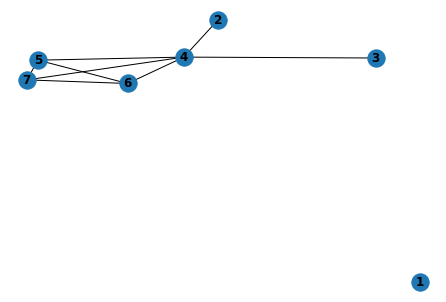

In [2]:
# define the input graph
G = nx.Graph()
edgeList = [(1,1), (2,4), (3,4), (4,5), (4,6), (4,7), (5,6), (5,7), (6,7)]
G.add_edges_from(edgeList)
nx.draw(G,with_labels=True, font_weight='bold')
plt.show()

**Q:** What do you expect to be the maximum density for this graph upon inspection?

**A:** <font color='blue'> 1.5 </font>

**Q:** What vertices do you expect to be inside subgraph with the density you answered above?

**A:** <font color='blue'> 4,5,6,7 </font>

The following code will generate the min-cut instance of the graph given above. It will then execute Ford-Fulkerson on the formulated graph and print out the max flow value as well as the list of nodes in the s side of the minimum cut. Fill in the missing pieces of code.

In [3]:
def gen_max_density(G, edges, d):
    """Returns the graph of the min cut instance of the maximum density problem with the given graph [G], graph edges [edges] and given density [d]."""
    dirG = nx.DiGraph()
    sink_edges = []
    
    #add vertex nodes
    for i in G.nodes:
        
        # TODO: Assign a value for the capacity of the edges going into the sink node. Hint: use a given parameter.
        # sink_edges.append((i, 't', XXX))
        ### BEGIN SOLUTION
        sink_edges.append((i, 't', d))
        ### END SOLUTION
        
        
    source_edges = []
    etv_edges = []  #edge to vertex edges
    edge_nodes = [] #list of all the edge nodes we need to add
    #total number of edges in the original graph that are not self loops
    total_edges = 0
    #add source to edge node edges and edge to vertex node edges
    for e in edges:
        if e[0] != e[1]:
            edge_nodes.append(str(e))
            
            # TODO: Assign a value for the capacity of the edges coming from the source node.
            # source_edges.append(('s',str(e), XXX))
            ### BEGIN SOLUTION
            source_edges.append(('s', str(e), 1))
            ### END SOLUTION
            
            etv_edges.append((str(e), e[0], math.inf))
            etv_edges.append((str(e), e[1], math.inf))
            total_edges += 1
    dirG.add_weighted_edges_from(sink_edges, 'cap' )
    dirG.add_weighted_edges_from(source_edges, 'cap' )
    dirG.add_weighted_edges_from(etv_edges, 'cap' )
    #assign positions to nodes
    for i in G.nodes:
        dirG.nodes[i]['pos'] = (40, 100-i*10)
    count = 0
    for i in edge_nodes:
        dirG.nodes[i]['pos'] = (20, 100-count*10)
        count +=1
    dirG.nodes['t']['pos'] = (60, len(edge_nodes)*10)
    dirG.nodes['s']['pos'] = (0, len(edge_nodes)*10)

    return dirG


def solve_min_cut(G):
    """Solves the given graph [G] that represents a min-cut instance. Prints out the flow and min-cut. """
    #solve the min cut instance
    ex= max_flow(G)
    ex.plot_graph()
    ex.ford_fulkerson(s='s', t='t', show=False)
    print("Max flow value: " + str(ex.get_flow_value(t='t')))
    ex.plot_flow()
    # ex.label(s='s', auto=True, show=False)
    value, cut = nx.minimum_cut(G, 's', 't', capacity = 'cap')
    s_cut, t_cut = cut
    ex.label_from_t(s_cut)
    print("Minimum s-t cut: " + str(ex.get_checked_nodes()))
    ex.plot_checked(residual=True)

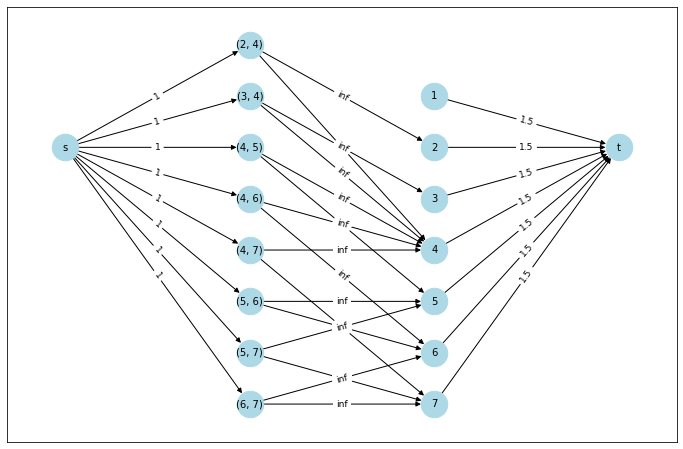

Max flow value: 8.0


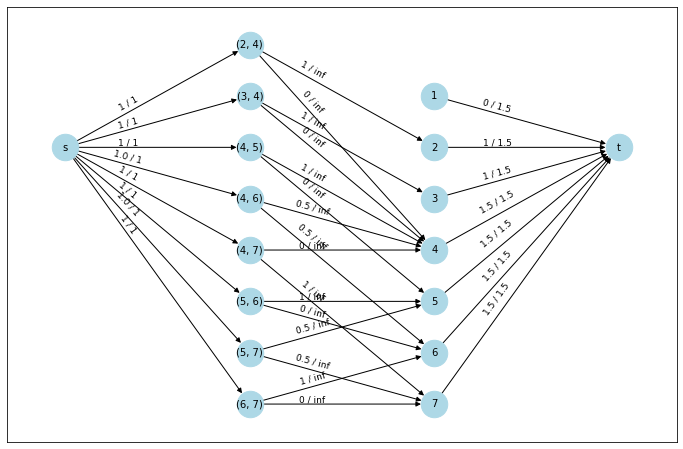

Minimum s-t cut: [4, 5, 6, 7, 's', '(4, 5)', '(4, 6)', '(4, 7)', '(5, 6)', '(5, 7)', '(6, 7)']


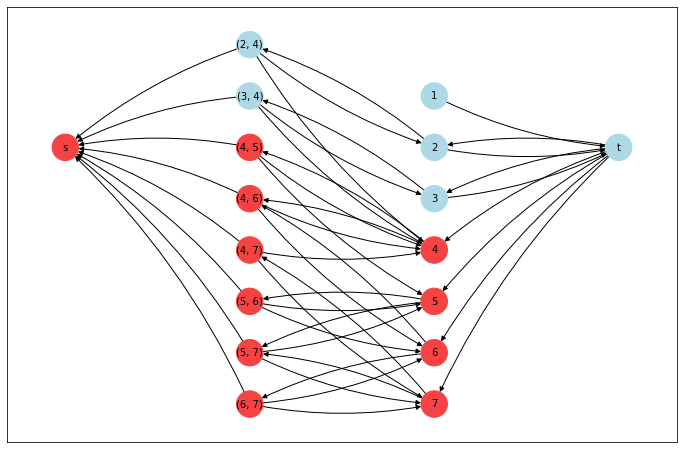

In [4]:
# TODO: Test this block of code with different values to find the maximum density.
# d = XXX
### BEGIN SOLUTION
d = 1.5
### END SOLUTION
dirG = gen_max_density(G, edgeList, d)
solve_min_cut(dirG)

**Q:** What was the maximum density subgraph you found?

**A:** <font color='blue'> 1.5 </font>

**Q:** What nodes are part of the subgraph that makes up this density?

**A:** <font color='blue'> 4,5,6,7 </font>

## Part 3: Taxi Pickup Application

In this part of the lab, we will apply the densest subgraph problem to the taxi data we previously saw with the MST approach. We can use this application to try to identify clusters in the data by determining a measure such that only dates "similar" enough to each other share an edge in the original graph.

The following code cell will load the taxi data and define some functions we will use to measure similarity. Here, we turn each day into a 96-element vector and take the norm (magnitude) of the vector calculated by the difference between two dates to represent how similar they are.

In [2]:
#Load the data
taxi_count = pickle.load(
        open( "data-lab/taxi_count_dict.pickle", "rb"))

#Functions to convert the data so that each element of the vector represents the proportion of total riders on a day
def total(i):
    data = taxi_count['count_vector'][i]
    sum = 0
    for val in data:
        sum += val
    return sum

def normalize(i):
    data = taxi_count['count_vector'][i]
    sum = total(i)
    normalized_data = list()
    for val in data:
        normalized_data.append(val/sum)
    return normalized_data

#Function that calculates distance between two days using the 2-norm
def get_distance(i, j):
     return np.linalg.norm(np.array(normalize(i)) - np.array(normalize(j)))

Next, we will use this code to generate a graph and return the number of occurrences of each weekday inside the subgraph found using the densest subgraph problem. We can define the parameter `distance` as the value such that all nodes that have a similarity measure less than it will share an edge in our graph. The parameter `density` is similar to Part 2 of this lab where it is the density of the subgraph we are looking for.

In [21]:
def taxi_density(distance, density, show=False):
    """Generates a graph from the taxi data and finds a minimum cut given that only dates with norm differences of [distance]
    away from each other share an edge. [density] is the density of the subgraph we wish to find."""
    G = nx.Graph()
    nodesList = []
    for i in range(365):
        nodesList.append(i)
    G.add_nodes_from(nodesList)

    edgeList = []
    for i in range(364):
        for j in range(i+1, 365):
            if get_distance(i, j) < distance:
                edgeList.append((i, j))

    G = nx.Graph()
    G.add_edges_from(edgeList)
    #illustrate the graph
    if show:
        plt.figure(figsize=(15, 10), tight_layout=True)
        nx.draw_networkx(G, with_labels = True, node_size = 300, font_size = 10)
        plt.show()
    print('Number of nodes: ' + str(G.number_of_nodes()))
    print('Max distance: '+ str(distance))
    print('Density: ' + str(density))
    
    #create a min-cut instance
    dirG = create_max_density(G, edgeList, density)
    #solve for a minimum cut
    value, cut = nx.minimum_cut(dirG, 's', 't', capacity = 'cap')
    s_cut, t_cut = cut
    dates = []
    days = []
    str_days = []
    num_to_day = {0:'Mon', 1: 'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
    for i in s_cut:
        if isinstance(i, int):
            dates.append(i)
            days.append(taxi_count['weekday'][i])
            str_days.append(num_to_day[taxi_count['weekday'][i]])
            
    #count the number of times each weekday occurs in the cut
    count = {}
    for i in range(7):
        count[num_to_day[i]] = days.count(i)
    print(count)

**Q:** What kind of clustering do you expect us to uncover and why?

**A:** <font color='blue'> weekends and weekdays, days of the week, etc. </font>

Run the following block of code to see if you can identify a cluster. Feel free to change the values to experiment with the possible clusters you may uncover!

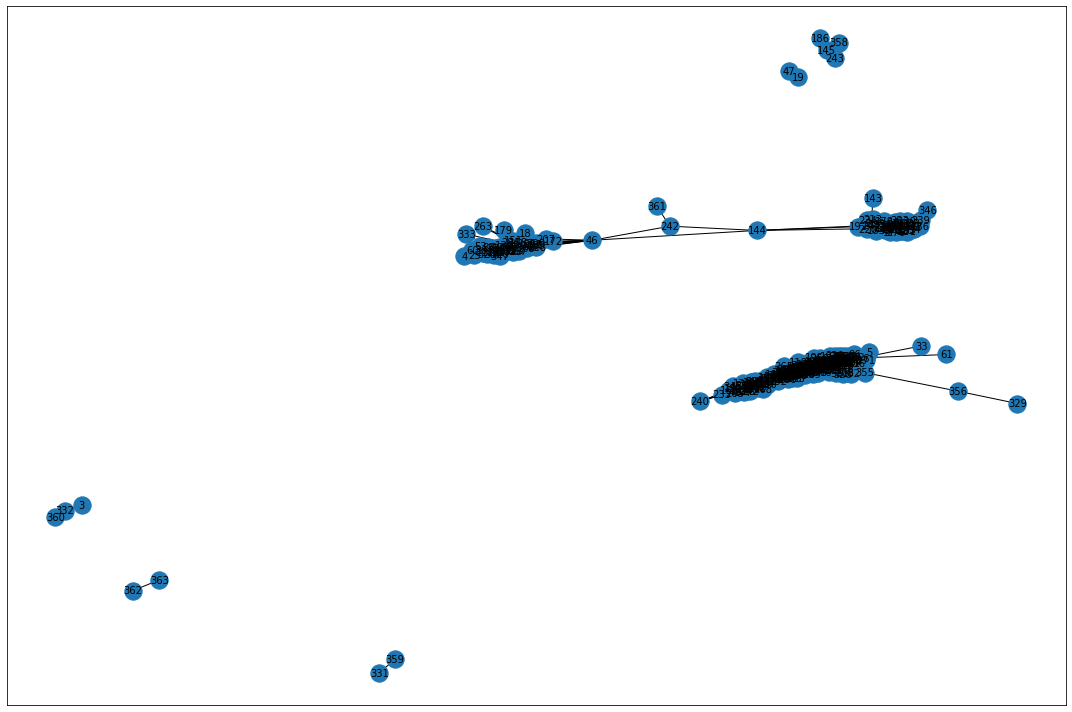

Number of nodes: 346
Max distance: 0.01
Density: 20
{'Mon': 42, 'Tues': 48, 'Wed': 48, 'Thur': 47, 'Fri': 44, 'Sat': 0, 'Sun': 0}


In [22]:
distance = .01
density = 20
taxi_density(distance, density, True)

**Q:** What kind clustering were you able to identify?

**A:** <font color='blue'> weekends and weekdays </font>

Run the following block of code to see some interesting behavior...

In [8]:
distance = .01
density = 35
taxi_density(distance, density)

distance = .01
density = 47
taxi_density(distance, density)

Number of nodes: 346
Max distance: 0.01
Density: 35
{'Mon': 38, 'Tues': 48, 'Wed': 46, 'Thur': 47, 'Fri': 14, 'Sat': 0, 'Sun': 0}
Number of nodes: 346
Max distance: 0.01
Density: 47
{'Mon': 13, 'Tues': 42, 'Wed': 45, 'Thur': 47, 'Fri': 6, 'Sat': 0, 'Sun': 0}


You'll notice that specifically two of the weekdays seem to contribute to the cluster as we increase the density of the subgraph.

**Q:** Which weekdays decrease significantly in occurrences in the cut that we found and why do you think this may be the case?

**A:** <font color='blue'> Monday and Friday. Fridays sometimes have patterns that follow more similarly to weekends, so that may be why it "dropped" out of the subgraph first. Mondays are also sometimes slightly different than the other weekdays as they are the start of a new work week and thus may exhibit different behavior. </font>

You might be thinking: this is very cool and all, but there doesn't seem to be a reason for us to cluster this specific set of data. Of course weekends are going to have different schedules than weekdays! While that may be true, using data with pretty clear expectations of behavior can help us verify the credibility of our algorithm. We just used a min cut problem to concretely find two distinct patterns! The taxi application may have seemed a bit artificial, but we can apply this to a variety of different sets of data, one of which is explored in the next part of this lab. 

## Part 4: Social Network Application

In part 4 of this lab, we will take a look at how the densest subgraph problem can help us in analyzing social networks. 

### Facebook Friend Network
We will analyze a graph that represents friendships through Facebook. Each node represents a person and each edge represents two people being friends with one another. Suppose we are interested in finding different communities within a social network, a subgroup of people that are hyperconnected to each other within the data we are given. We can see the similarities between finding such a subgroup with finding a subgraph with a very high density, as ideally we will have many edges concentrated between a subset of nodes representing many mutual friendships among the subgroup we have found.

The social network we will look at today consists of 4039 people and 88234 friendships. Below is a picture of what the social network looks like:

![title](images-lab/fb_network.png)

Run the following code to find the densest subgraph on this network (it may take a few minutes to finish executing):

In [3]:
density = 77.3
fb, edge_list = generate_fb(show = False)
solve_network(fb, edge_list, density, display_color = False, display_community = False)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
solving...
Community size: 202
Number of connections: 15624
[1912, 1917, 1918, 1925, 1929, 1938, 1941, 1943, 1946, 1953, 1962, 1963, 1966, 1971, 1979, 1983, 1984, 1985, 1986, 1989, 1993, 1997, 2005, 2020, 2030, 2033, 2037, 2040, 2043, 2045, 2046, 2056, 2059, 2060, 2063, 2064, 2069, 2073, 2074, 2077, 2078, 2083, 2084, 2086, 2088, 2090, 2093, 2095, 2098, 2103, 2104, 2108, 2109, 2112, 2115, 2118, 2121, 2122, 2123, 2124, 2131, 2139, 2140, 2142, 2150, 2154, 2164, 2165, 2172, 2179, 2184, 2188, 2190, 2200, 2201, 2206, 2210, 2212, 2213, 2216, 2218, 2220, 2229, 2233, 2237, 2240, 2244, 2253, 2257, 2261, 2266, 2271, 2275, 2276, 2278, 2290, 2299, 2300, 2306, 2307, 2308, 2309, 2323, 2324, 2326, 2329, 2331, 2334, 2339, 2340, 2347, 2348, 2352, 2353, 2354, 2356, 2359, 2363, 2369, 2370, 2374, 2376, 2381, 2386, 2392, 2395, 2404, 2407, 2408, 2409, 2410, 2414, 2418, 2423, 2428, 2430, 2433, 2446, 2460, 2462, 2464, 2467

**Q:** How many people were in the community you just found?

**A:** <font color='blue'> 202 </font>

Here is a (rough) picture of what the network looks like with the community you just found in red:

![title](images-lab/fb_community_in_network.png)

*Since the runtime per execution of the algorithm is a bit long, we've given you the highest density value already (77.3). If you're interested in how this was determined, it can be found using binary search on the density value. However, with a small enough sample, you could also find this value experimentally similar to what we did at the beginning of this lab.*

The community itself looks like:

![title](images-lab/fb_community.png)

Notice how dense this community is! If we think closely about this, the density of a subgraph is twice the average number of friends that each person in that subset has within that subgraph. Thus, we have just found a community where the average number of friends from person to person is about 39 (given our maximum density value of 77.3). Unfortunately, since this data is anonymous, we can't decipher much about it's meaning just yet. But, we've just narrowed down our data from about 4000 vertices to only about 200. Finding these dense subgraphs can help us better understand messy graphs and discover trends that we might not have anticipated, and they allow us to focus our analysis on clusters of people related to the data we are trying to learn more about!

### Marvel Superhero Network
Now, let's analyze a social network you may be more familiar with: the Marvel superhero universe! Our graph will represent the following: each vertex represents a hero and each edge represents two heroes appearing in the same comic book together. Additionally, the weight of each edge represents how many times the two heroes have appeared together. You may be wondering, could this data even possibly point to anything representative of the real world? Surprisingly, yes! In fact, a few studies have been done on the Marvel network and they found that it behaves very similar to a real social network. 

To quote the authors of the research paper "Marvel Universe looks almost like a real social network": *...most pairs of characters that have jointly appeared in the same comic book have fought shoulder to shoulder or each other, or have had some other strong relationship, like family ties or kidnapping. Thus, it shares, in its artificial way, the true social nature of scientific collaboration networks...*

The original dataset contains 6,486 heroes, but today we'll be using a condensed data set of 327 heroes and 9891 connections to speed up the analysis. The heroes contained in our data set were chosen because they had the most connections in the network. Here is what the graph looks like:

![title](images-lab/hero_network.png)

Because we have weighted edges, we can use a similar tool of analysis as we did for the taxi pickup data by setting a minimum threshold such that if any edges have weights less than that, we won't include that edge in our graph instance. Run the following block of code to identify a community. Feel free to change the `min_weight` and `density` values to see if you can find other clusters.

In [3]:
min_weight = 70
density = 7
marvel, edge_list = generate_marvel(min_weight, show = False)
solve_network(marvel, edge_list, density, display_color = False, display_community = False)

Name: 
Type: Graph
Number of nodes: 158
Number of edges: 550
Average degree:   6.9620
solving...
Community size: 24
Number of connections: 169
['Mr. Fantastic / Reed R', 'Crystal [inhuman]', 'Ant-man / Dr. Henry J.', 'Thing / Benjamin J. Gr', 'Jarvis, Edwin', 'Iron Man / Tony Stark', 'Thor / Dr. Donald Blak', 'Wonder Man / Simon Wil', 'Captain America', 'Wasp / Janet Van Dyne', 'Invisible Woman / Sue', 'Hulk / Dr. Robert Bruce Banner', "Black Panther / T'chal", 'Scarlet Witch / Wanda', 'Hawk', 'She-hulk / Jennifer Wa', 'Vision', 'Sub-mariner / Namor Ma', 'Human Torch / Johnny S', 'Black Widow / Natasha', 'Quicksilver / Pietro M', 'Hercules [greek God]', 'Beast / Henry &hank& P', 'Spider-man / Peter Parker']


**Q:** Using min_weight = 70 and density = 7, how many people were in the community you just found?

**A:** <font color='blue'> 24 </font>

How awesome is that? We just found a cluster of heroes that are some of the most well-known heroes from the Marvel universe. On first glance, we have characters from 
- the cinematic universe of the *Avengers*: Quicksilver, Thor, Scarlet Witch, Jarvis, Hawk(eye), Black Widow, Captain America, Iron Man, Ant-man, Vision, Hulk, Spider-man, the Wasp, and Black Panter. 
- the *Fantastic Four*: the Thing, Invisible Woman, Mr. Fantastic, and Human Torch

(please excuse our limited Marvel knowledge)

Here is the what that subgraph looks like in the whole graph:

![title](images-lab/hero_community_network.png)

Here is what the subgraph edges look like (the graph itself is formatted a bit differently here):

![title](images-lab/hero_community_edges.png)

Also, if we zoom in on some vertices in the cluster, we'll see that they are all highly connected characters:

![title](images-lab/marvel_community_zoomin.png)

An initial thought you might have is that this yields the cluster of heroes with the top 24 number of connections in the network. Running some tests, we found the following stats:

- ordering heroes by the sum of the weights of edges they were connected to in the graph:
    - 9 out of the top 10 heroes are in our subgraph
    - the heroes in our subgraph are in the top 46
- ordering heroes by the number of edges they were connected to in the graph:
    - 8 out of the top 10 heroes are in our subgraph
    - the heroes in our subgraph are in the top 52

Whereas the meaning behind the community we found in the anonymous Facebook network was hard to decipher, our Marvel network has allowed us to identiify a pretty neat and meaningful cluster. Hopefully, you're beginning to see the usefulness behind the densest subgraph problem!

### Erdos Number Network
Finally, let's take a look at the Erdos Number network. Similar to Bacon numbers which exist in the realm of movies and actors, Erdos numbers describe how "far apart" you are from publishing a paper with the famous mathematician, Paul Erdos. Erdos himself has an Erdos number of 0, people who have directly collaborated with Erdos have Erdos number 1, people who have collaborated with an author who has Erdos number 1 have Erdos number 2, and so on. We'll use the densest subgraph problem to see if we can identify a meaningful community in this network.

Below is the graph of all people who have an Erdos number of 2 or less as of 2002. There are 6927 authors (one of which is our very own Professor David Shmoys!) and 11850 edges.

![title](images-lab/erdos2_full.png)

**Q:** Which Erdos number(s) do you expect to be most prominent in the community we find and why?

**A:** <font color='blue'> Erdos number 0 (because everyone with Erdos number 1 has an edge connecting them to Erdos) and/or Erdos number 1 (because it is reasonable to expect the subgraph to not just consist of Erdos himself and Erdos number 1 authors can be expected to have more edges in general compared to Erdos number 2 authors) </font>

In [2]:
# Run this block of code to find the community
density = 7.8
erdos, edge_list = generate_erdos(show = False)
community = solve_network(erdos, edge_list, density, display_color = False, display_community = False)

Name: 
Type: Graph
Number of nodes: 6927
Number of edges: 11850
Average degree:   3.4214
solving...
Community size: 78
Number of connections: 610
['494', '71', '379', '147', '1882', '471', '226', '58', '390', '163', '380', '500', '385', '127', '177', '455', '179', '202', '44', '2645', '450', '1993', '164', '46', '200', '498', '1577', '21', '453', '3752', '267', '475', '338', '80', '1203', '260', '122', '286', '6', '407', '445', '426', '274', '374', '253', '133', '3184', '4947', '78', '288', '266', '249', '412', '399', '5544', '139', '6927', '10', '359', '434', '186', '333', '436', '157', '465', '458', '466', '323', '5315', '176', '8', '282', '5280', '69', '6232', '257', '3253', '334']


In [3]:
# Now run this block of code to print a list of the names of the authors in the community
authors = erdos_dict()
print('\nAuthors in the community found: ')
print(list(map(lambda x:authors[x], community)))


Authors in the community found: 
['WEST, DOUGLAS B.', 'CHEN, GUANTAO', 'ROTHSCHILD, BRUCE L.', 'FUREDI, ZOLTAN', 'DUFFUS, DWIGHT A.', 'TROTTER, WILLIAM T., JR.', 'JACOBSON, MICHAEL S.', 'BURR, STEFAN ANDRUS', 'SAKS, MICHAEL E.', 'GOULD, RONALD J.', 'ROUSSEAU, CECIL CLYDE', 'WORMALD, NICHOLAS C.', 'RUZSA, IMRE Z.', 'FAUDREE, RALPH J.', 'GYORI, ERVIN', 'SZEKELY, LASZLO A.', 'HAJNAL, ANDRAS', 'HENNING, MICHAEL A.', 'BOLLOBAS, BELA', 'HAJNAL, PETER', 'SWART, HENDA C.', 'ERDOS, PETER L.', 'GRAHAM, RONALD L.', 'BONDY, JOHN ADRIAN', 'HELL, PAVOL', 'WINKLER, PETER M.', 'COPPERSMITH, DON', 'BABAI, LASZLO', 'SZEGEDY, MARIO', 'LESNIAK, LINDA M.', 'KUBICKI, GRZEGORZ', 'TUZA, ZSOLT', 'PACH, JANOS', 'CHVATAL, VACLAV', 'BRIGHTWELL, GRAHAM R.', 'KOSTOCHKA, ALEXANDR V.', 'ENTRINGER, ROGER C.', 'LOVASZ, LASZLO', 'AJTAI, MIKLOS', 'SCHWENK, ALLEN JOHN', 'STRAUS, ERNST GABOR*', 'SIMONOVITS, MIKLOS', 'LEHEL, JENO', 'RODL, VOJTECH', 'KOHAYAKAWA, YOSHIHARU', 'FISHBURN, PETER C.', 'KAHN, JEFFRY N.', 'PUDLAK, 

Here is what the community looks like with the following color codes:

- Erdos number 0 => yellow
- Erdos number 1 => red
- Erdos number 2 => magenta

![title](images-lab/erdos2_edges.png)

What we notice is that first, Paul Erdos himself is indeed in the community (hopefully this does not surprise you, afterall the network is centered around him), and second, the majority of people in our densest subgraph have Erdos number 1! In fact, we ran the Densest Subgraph problem on a network of only Erdos number 1 authors (511 authors total) and found a cluster of 50 people. All but one person in that cluster were included in our overall Erdos subgraph. 

Here is the makeup of our 78 person community:

- 1 is Erdos 0 (Paul Erdos)
- 65 are Erdos 1
- 12 are Erdos 2

*If you want to take a look at the community we found from the Erdos number 1 authors or the list of Erdos number 1 authors itself, they are located the in data-lab folder associated with this lab.*

Again, we're starting to see that the communities we can find using the Densest Subgraph can reflect common characteristics or display certain behaviors. Here, we can continue to ask more questions if we want to find more underlying meanings such as: what fields of mathematics did this community publish papers in, did all of these authors publish papers with one common coauthor, etc.